# Lab Review -- Any Questions?

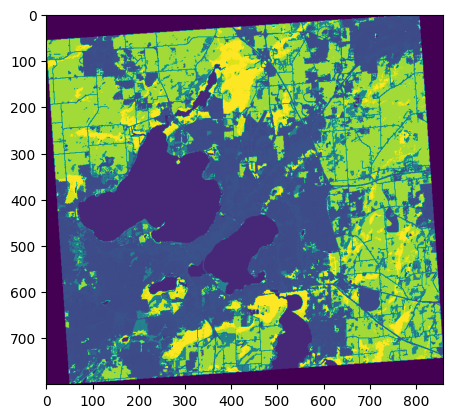

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.mask import mask
from shapely.geometry import box
import geopandas as gpd

land = rasterio.open("zip://../..//p6/land.zip!wi.tif")
# a = land.read()
window = gpd.GeoSeries([box(-89.5, 43, -89.2, 43.2)]).set_crs("epsg:4326").to_crs(land.crs)
plt.imshow(mask(land, window, crop=True)[0][0])

# Broadcast

In [9]:
v1 = np.array([1,2,3]).reshape(-1, 1)
v1

array([[1],
       [2],
       [3]])

In [10]:
v2 = np.array([4,5,6]).reshape(-1, 1)
v2

array([[4],
       [5],
       [6]])

In [11]:
v1 * v2 # 1*4, 2*5, 3*6

array([[ 4],
       [10],
       [18]])

In [12]:
v1 * v2.T # TODO: what in the world is going on here?

array([[ 4,  5,  6],
       [ 8, 10, 12],
       [12, 15, 18]])

# Dot Product

# Predicting with dot product

1. use case for dot product
2. one's column
3. matrix dot vector

$\begin{bmatrix}
1 & 2 \\ 3 & 4\\
\end{bmatrix}
\cdot
\begin{bmatrix}
10 \\ 1 \\
\end{bmatrix}$

In [15]:
import pandas as pd
import numpy as np

houses = pd.DataFrame([[2,1,1985],
                       [3,1,1998],
                       [4,3,2005],
                       [4,2,2020]],
                      columns=["beds", "baths", "year"])
houses

,beds,baths,year
0,2,1,1985
1,3,1,1998
2,4,3,2005
3,4,2,2020


In [6]:
# take row (as Series)
# return estimated price (in thousands)
def predict_price(house):
    return ((house["beds"]*42.3) + (house["baths"]*10) + 
            (house["year"]*1.67) - 3213)

# Fitting with `np.linalg.solve`

**Above:** we estimated house prices using a linear model based on the dot product as follows:

$Xc = y$

* $X$ (known) is a matrix with house features (from DataFrame)
* $c$ (known) is a vector of coefficients (our model parameters)
* $y$ (computed) are the prices

**Below:** what if X and y are know, and we want to find c?

In [24]:
houses = pd.DataFrame([[2,1,1985,196.55],
                       [3,1,1998,260.56],
                       [4,3,2005,334.55],
                       [4,2,2020,349.60]],
                      columns=["beds", "baths", "year", "price"])
houses

,beds,baths,year,price
0,2,1,1985,196.55
1,3,1,1998,260.56
2,4,3,2005,334.55
3,4,2,2020,349.60


If we assume price is linearly based on the features, with this equation:

* $beds*c_0 + baths*c_1 + year*c_2 + 1*c_3 = price$

Then we get four equations:

* $2*c_0 + 1*c_1 + 1985*c_2 + 1*c_3 = 196.55$
* $3*c_0 + 1*c_1 + 1998*c_2 + 1*c_3 = 260.56$
* $4*c_0 + 3*c_1 + 2005*c_2 + 1*c_3 = 334.55$
* $4*c_0 + 2*c_1 + 2020*c_2 + 1*c_3 = 349.60$


In [22]:
X = houses.loc[:, "beds":"year"].values
X = np.concatenate([X, np.ones(4).reshape(-1,1)], axis=1)
X

array([[2.000e+00, 1.000e+00, 1.985e+03, 1.000e+00],
       [3.000e+00, 1.000e+00, 1.998e+03, 1.000e+00],
       [4.000e+00, 3.000e+00, 2.005e+03, 1.000e+00],
       [4.000e+00, 2.000e+00, 2.020e+03, 1.000e+00]])

In [25]:
y = houses[["price"]].values
y

array([[196.55],
       [260.56],
       [334.55],
       [349.6 ]])

In [26]:
c = np.linalg.solve(X, y)
c

array([[ 4.230e+01],
       [ 1.000e+01],
       [ 1.670e+00],
       [-3.213e+03]])

In [29]:
X @ c

array([[196.55],
       [260.56],
       [334.55],
       [349.6 ]])

# Two Perspectives on `Matrix @ vector`

$\begin{bmatrix}
4&5\\6&7\\8&9\\
\end{bmatrix}
\cdot
\begin{bmatrix}
2\\3\\
\end{bmatrix}
= ????
$

In [27]:
X = np.array([[4,5], [6,7], [8,9]])
c = np.array([2, 3]).reshape(-1,1)
X @ c

array([[23],
       [33],
       [43]])

## Row Picture

Do dot product one row at a time.

$\begin{bmatrix}
4&5\\6&7\\8&9\\
\end{bmatrix}
\cdot
\begin{bmatrix}
2\\3\\
\end{bmatrix}
=
\begin{bmatrix}
(4*2)+(5*3)\\
(6*2)+(7*3)\\
(8*2)+(9*3)\\
\end{bmatrix}
=
\begin{bmatrix}
23\\
33\\
43\\
\end{bmatrix}
$

## Column Picture

$\begin{bmatrix}
c_0&c_1&c_2\\
\end{bmatrix}
\cdot
\begin{bmatrix}
x\\y\\z\\
\end{bmatrix}
=(c_0*x) + (c_1*y) + (c_2*z)
$

Dot product takes a **linear combination** of columns.

$\begin{bmatrix}
4&5\\6&7\\8&9\\
\end{bmatrix}
\cdot
\begin{bmatrix}
2\\3\\
\end{bmatrix}
=
\begin{bmatrix}
4\\6\\8\\
\end{bmatrix}*2
+
\begin{bmatrix}
5\\7\\9\\
\end{bmatrix}*3
=
\begin{bmatrix}
23\\
33\\
43\\
\end{bmatrix}
$